In [27]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score



#from sklearn.naive_bayes import BernoulliNB
#bnb = BernoulliNB()

In [28]:
df = pd.read_csv('newyork_crime2013.csv')
df = df.drop_duplicates()
df = df.fillna(0)

#print(df.head())
#print(df.shape)

In [29]:
#Feature Engineering

df['Population'] = df['Population'].str.replace(',','')
pop_numeric = pd.to_numeric(df['Population'])
df['PopSquared'] = pop_numeric ** 2

#print(df['PopSquared'])

df['IndicateMurder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
r_numeric = pd.to_numeric(df['Robbery'], errors='coerce').fillna(0)
df['IndicateRobbery'] = np.where(r_numeric > 0, 1, 0)

df['Larceny-\ntheft'] = df['Larceny-\ntheft'].str.replace(',','')
larceny_numeric = pd.to_numeric(df['Larceny-\ntheft'])
df['IndicateLarceny'] = np.where(larceny_numeric > 0, 1, 0)

df['Aggravated\nassault'] = df['Aggravated\nassault'].str.replace(',','')
agg_assault_numeric = pd.to_numeric(df['Aggravated\nassault'])
df['IndicateAggravatedAssault'] = np.where(agg_assault_numeric > 0, 1, 0)

df['Robbery'] = df['Robbery'].str.replace(',','')
Robbery_numeric = pd.to_numeric(df['Robbery'])
df['IndicateRobbery'] = np.where(Robbery_numeric > 0, 1, 0)

df['Rape\n(legacy\ndefinition)2'] = df['Rape\n(legacy\ndefinition)2'].str.replace(',','')
Rape_numeric = pd.to_numeric(df['Rape\n(legacy\ndefinition)2'])
df['IndicateRape'] = np.where(Rape_numeric > 0, 1, 0)

df['Violent\ncrime'] = df['Violent\ncrime'].str.replace(',','')
vcrime_numeric = pd.to_numeric(df['Violent\ncrime'])
df['IndicateRape'] = np.where(vcrime_numeric > 0, 1, 0)

df['Burglary'] = df['Burglary'].str.replace(',','')
burglary_numeric = pd.to_numeric(df['Burglary'])
df['IndicateBurglary'] = np.where(burglary_numeric > 0, 1, 0)

df['Motor\nvehicle\ntheft'] = df['Motor\nvehicle\ntheft'].str.replace(',','')
gta_numeric = pd.to_numeric(df['Motor\nvehicle\ntheft'])
df['IndicateGTA'] = np.where(gta_numeric > 0, 1, 0)

df['IndicateArson'] = df['Arson3'].astype(int)

df['Property\ncrime'] = df['Property\ncrime'].str.replace(',','')
pd.to_numeric(df['Property\ncrime'])




print(df.head())

                       City Population Violent\ncrime  \
0             Adams Village       1861              0   
1  Addison Town and Village       2577              3   
2             Akron Village       2846              3   
3                    Albany      97956            791   
4            Albion Village       6388             23   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                       0                           0.0   
1                                       0                           0.0   
2                                       0                           0.0   
3                                       8                           0.0   
4                                       0                           0.0   

  Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                           0       0                   0              12   
1                           0       0               

AxesSubplot(0.125,0.125;0.62x0.755)


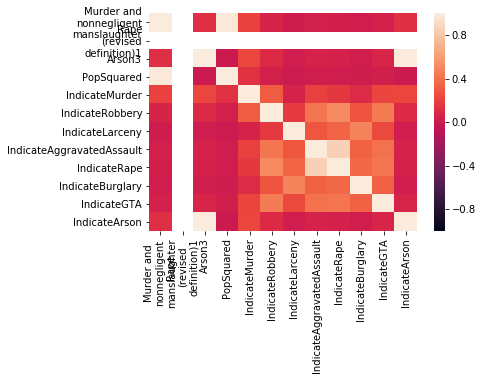

In [30]:
df_heat = sns.heatmap(df.corr(), vmin=-1, vmax=1)

print(df_heat)

In [31]:
#Splitting our data

X = df.drop(['Murder and\nnonnegligent\nmanslaughter', 'IndicateMurder', 'City'], 1)
Y = df['IndicateMurder']
print(X.shape)
print(Y.shape)

(348, 19)
(348,)


## SelectKbest:

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G

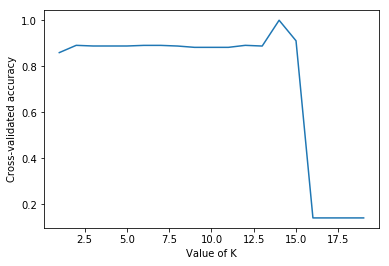

In [32]:
#Selecting the best value for K

k_range = range(1,20)
k_scores = []
for kvar in k_range:
    skb_var = SelectKBest(f_classif, k=kvar).fit_transform(X, Y)
    logregr = LogisticRegression(C=1e9)
    scores = cross_val_score(logregr, skb_var, Y, cv=10)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated accuracy')
plt.show()

#### From the above graph, we see that the highest accuracy score occurs when the value of our parameter K in selectKbest is equal to 15.


In [33]:
# Using selectKbest to reduce our features.
skb_df = SelectKBest(f_classif, k=15).fit_transform(X, Y)


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [2] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [34]:
#After applying selectKbest, I split the data into train and test groups.

train_X, test_X, train_Y, test_Y = train_test_split(skb_df, Y, test_size=.2, random_state=20)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(type(train_X))
print(type(test_X))

(278, 15)
(278,)
(70, 15)
(70,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## PCA:

In [35]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o


X_norm = StandardScaler().fit_transform(X)

In [36]:
#Apply PCA

pca = PCA(.95)
pca_X = pca.fit_transform(X_norm)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

print(comp_no)
print(comp_var_ratio)
#print(p_components)

6
[0.55349031 0.1697093  0.11022691 0.05677215 0.04237035 0.02994976]


In [37]:
pca_df = pd.DataFrame(data=pca_X)
#print(pca_df.head())
print(pca_df.shape)

(348, 6)


In [38]:
#After applying PCA, I split the data into train and test groups.

train_X_pca, test_X_pca, train_Y_pca, test_Y_pca = train_test_split(pca_X, Y, test_size=.2, random_state=20)

print(pca_X.shape)


(348, 6)


## Logistic Regression using selectKbest:

Coefficients
[[ 1.06934401e-05  6.78864195e+00 -6.77756922e+00 -6.79504005e+00
  -6.77534606e+00  2.22424269e-03  3.32742102e-05 -2.38216576e-03
   4.57313424e-03 -7.28902320e-02  1.17273637e+00  3.35734682e-01
  -9.17342121e-01  3.00320536e-01 -7.28902320e-02]]


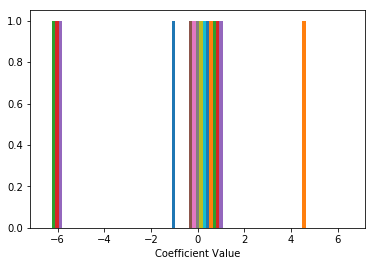


[-5.69932865]

 Percentage accuracy
1.0


In [39]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
logregr = LogisticRegression(C=1e9)


# Fit the model.
fit = logregr.fit(train_X, train_Y)

# Display.
print('Coefficients')
print(fit.coef_)
plt.hist(fit.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
print()
print(fit.intercept_)
#pred_y = logregr.predict(test_X)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y, test_Y))

print('\n Percentage accuracy')
print(logregr.score(test_X, test_Y))

## Logistic Regression using PCA:

Coefficients
[[ 8.96969289 -3.60176561 -1.27309423  0.11372595  1.83461919  0.0334954 ]]


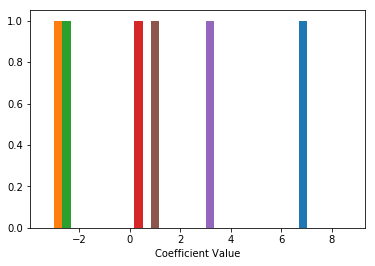

[-3.8467803]

 Percentage accuracy
0.9428571428571428


In [40]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
logregr_pca = LogisticRegression(C=1e9)


# Fit the model.
logregr_pca.fit(train_X_pca, train_Y_pca)

# Display.
print('Coefficients')
print(logregr_pca.coef_)
plt.hist(logregr_pca.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
print(logregr_pca.intercept_)
#pred_y_pca = logregr.predict(test_X_pca)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y_pca, test_Y_pca))

print('\n Percentage accuracy')
print(logregr_pca.score(test_X_pca, test_Y_pca))

#### Using PCA, instead of seleckbest, for feature selection allowed my logistic regression model to have a much better accuracy score of 91%

# Ridge Logistic Regression:

In [41]:
X_pcrime = df.drop(['Property\ncrime', 'City'], 1)
Y_pcrime = df['Property\ncrime']
print(X.shape)
print(Y.shape)

(348, 19)
(348,)


## SelectKbest - second model:

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\PV-R68G

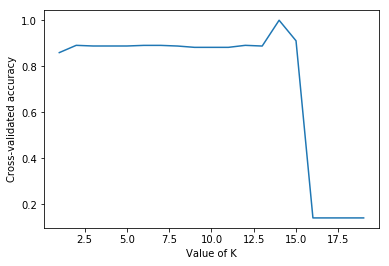

In [42]:
k_range2 = range(1,20)
k_scores2 = []
for kvar in k_range2:
    skb_var2 = SelectKBest(f_classif, k=kvar).fit_transform(X_pcrime, Y_pcrime)
    logregr2 = LogisticRegression(penalty='l2', C=10)
    scores = cross_val_score(logregr2, skb_var2, Y, cv=10)
    k_scores2.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-validated accuracy')
plt.show()

#### The optimum value for k in selectKbest is 15.

In [43]:
# Using selectKbest to reduce our features.
LR_skb_df = SelectKBest(f_classif, k=15).fit_transform(X_pcrime, Y_pcrime)

C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [44]:
#After applying selectKbest, I split the data into train and test groups.

train_XLR, test_XLR, train_YLR, test_YLR = train_test_split(LR_skb_df, Y_pcrime, test_size=.2, random_state=20)

## PCA - second model:

In [45]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o


XLR_norm = StandardScaler().fit_transform(X_pcrime)

In [46]:
#Apply PCA

pcaLR = PCA(.95)
pca_XLR = pca.fit_transform(XLR_norm)

#comp_no_LR = pcaLR.n_components_
#comp_var_ratioLR = pcaLR.explained_variance_ratio_

#print(comp_no_LR)
#print(comp_var_ratioLR)
#print(p_components)

In [47]:
pca_df_LR = pd.DataFrame(data=pca_XLR)
#print(pca_df_LR.head())
print(pca_df_LR.shape)

(348, 7)


In [48]:
#After applying PCA, I split the data into train and test groups.

train_X_pcaLR, test_X_pcaLR, train_Y_pcaLR, test_Y_pcaLR = train_test_split(pca_XLR, Y_pcrime, test_size=.2, random_state=20)

print(pca_XLR.shape)


(348, 7)


## L2 regularization after selectKBest:

Coefficients
[[-7.29447921e-10 -1.21028740e-12 -1.43736872e-16 ... -9.34101897e-14
  -1.21930242e-12 -3.50247689e-14]
 [-3.79516318e-10 -4.55802901e-13 -1.53147295e-16 ... -4.68877297e-14
  -2.53333568e-13 -1.37316542e-14]
 [-4.86693876e-10 -5.60066857e-13 -1.45586980e-16 ... -7.33478311e-14
  -2.97573766e-13 -2.38960863e-14]
 ...
 [-5.07735469e-04  4.95580346e-07  2.81813236e-08 ... -5.64055471e-08
  -1.73082055e-07 -1.28865102e-08]
 [-5.47789649e-04 -6.95761819e-07 -6.94940611e-10 ... -6.66612071e-08
  -2.88525792e-07 -1.77477377e-08]
 [-4.64050473e-08 -4.81012199e-11 -1.68851887e-14 ... -4.75444286e-12
  -2.60500598e-11 -1.52541879e-12]]


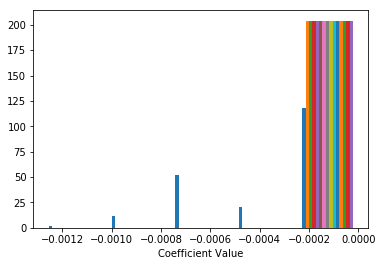


Intercept
[-6.12089868e-13 -2.67357456e-13 -3.89838984e-13 -4.17792925e-07
 -6.13913836e-13 -1.42667097e-07 -2.28844642e-07 -6.54979644e-11
 -3.53876597e-11 -3.46725755e-07 -1.16371889e-13 -5.21015363e-07
 -3.53265310e-11 -1.68936765e-07 -6.98679655e-11 -5.34354555e-14
 -1.61767907e-10 -2.61101749e-13 -1.36962807e-13 -1.57934017e-10
 -3.66293678e-07 -2.62192928e-07 -1.76659473e-07 -1.10009519e-13
 -5.24271839e-13 -1.93130213e-07 -4.92957300e-07 -2.85876304e-13
 -7.60535365e-11 -6.95092612e-11 -5.47443321e-13 -5.16153948e-13
 -2.90459321e-07 -3.43040834e-07 -5.00336526e-07 -8.62736743e-08
 -1.08912237e-12 -2.73352900e-13 -1.51348093e-07 -3.35162231e-13
 -2.65699112e-13 -1.51471633e-10 -1.30184455e-07 -1.35126382e-13
 -6.61799875e-07 -9.58230354e-09 -1.32100440e-13 -6.08608063e-13
 -1.32100440e-13 -4.57109854e-14 -1.72270528e-14 -6.56601273e-11
 -3.83489377e-12 -2.69396567e-13 -5.98582644e-13 -6.69609118e-13
 -5.04582424e-13 -3.30947761e-07 -6.06911117e-07 -3.68702286e-07
 -6.36268889e-

In [49]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above. l2 stands for ridge regression regularization. The higher the 
# C value, the lower the lambda for ridge regression.  In the plain vanilla logistic regression above, our C value was 1e9,
# or 1 billion.  Here C will be 10, which will result in a higher lambda value.
logregr_L2 = LogisticRegression(penalty='l2', C=10)


# Fit the model.
logregr_L2.fit(train_XLR, train_YLR)

# Display.
print('Coefficients')
print(logregr_L2.coef_)
plt.hist(logregr_L2.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
print()
print('Intercept')
print(logregr_L2.intercept_)
#pred_y = logregr.predict(test_X)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y, test_Y))

print('\n Percentage accuracy')
print(logregr_L2.score(test_XLR, test_YLR))

## L2 regularization after PCA:

Coefficients
[[ 0.41410026  0.25358187  0.08648768 ...  0.54568355 -0.44970464
   0.31670083]
 [ 0.37768515  0.78876411  0.17939797 ... -0.18464087  0.37517053
  -0.01695133]
 [ 0.36937392  0.8486883   0.13002109 ...  0.02026248  1.09947098
   0.22185843]
 ...
 [ 0.26089293 -0.19329768  0.04577007 ... -0.51790323  0.34396479
   0.15684394]
 [ 0.48888652  0.12036483 -0.20870613 ... -0.10121652 -0.71867337
   0.776878  ]
 [ 0.27345508 -0.10590434 -0.5824131  ...  0.69917006  0.21142587
  -0.20760439]]


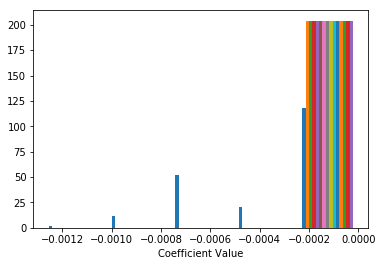

[-6.30643616 -5.81761447 -5.69708413 -6.03862934 -5.46124279 -5.41164287
 -5.42479492 -5.99611298 -5.66771302 -5.79823691 -5.45366537 -5.45416327
 -5.91787493 -5.78718477 -5.83133388 -5.04667134 -5.45670767 -5.91923926
 -5.91904468 -5.45740286 -5.43375451 -5.42873824 -5.8703319  -5.66675061
 -5.13106511 -5.84332202 -5.78574339 -5.9233233  -7.02640544 -5.45411932
 -5.57875672 -5.45084024 -5.45525025 -5.84882036 -5.45098933 -5.15470899
 -5.97729168 -5.91329756 -5.79232445 -5.4590756  -5.65951616 -5.91192969
 -5.43447933 -5.36373977 -5.4531468  -6.25288522 -5.4455162  -5.65988688
 -5.82742126 -5.36696411 -5.08972301 -5.91086563 -5.83156368 -5.45429079
 -5.92400696 -5.44299169 -5.75408144 -5.44257651 -5.44889033 -5.66495885
 -5.44803776 -5.18218565 -5.66518875 -5.46079948 -5.46763339 -5.08349008
 -5.74573972 -5.53715511 -6.52589758 -5.29518923 -5.4439523  -5.44704117
 -5.35649623 -5.67061633 -5.43728177 -5.4590729  -5.92762261 -5.65898021
 -5.89865538 -5.44269754 -5.44908005 -5.91721071 -5

In [50]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above. l2 stands for ridge regression regularization. The higher the 
# C value, the lower the lambda for ridge regression.  In the plain vanilla logistic regression above, our C value was 1e9,
# or 1 billion.  Here C will be 10, which will result in a higher lambda value.
logregr_L2_pca = LogisticRegression(penalty='l2', C=10)


# Fit the model.
logregr_L2_pca.fit(train_X_pcaLR, train_Y_pcaLR)

# Display.
print('Coefficients')
print(logregr_L2_pca.coef_)
plt.hist(logregr_L2.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
print(logregr_L2_pca.intercept_)
#pred_y = logregr.predict(test_X)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y, test_Y))

print('\n Percentage accuracy')
print(logregr_L2_pca.score(test_X_pcaLR, test_Y_pcaLR))

## L1 regularization after selectKBest:

Coefficients
[[ 2.53896848e-04  1.23904666e-02  0.00000000e+00 ...  0.00000000e+00
  -5.77967519e+00  0.00000000e+00]
 [ 5.20223258e-04 -2.09936524e-01  0.00000000e+00 ...  0.00000000e+00
   2.32922028e+00  0.00000000e+00]
 [-9.60158794e-06  0.00000000e+00  0.00000000e+00 ... -1.72998078e+00
   2.00104220e+00  0.00000000e+00]
 ...
 [-2.36387682e-03  1.30991999e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.05550085e-04 -4.25773662e-01  0.00000000e+00 ...  0.00000000e+00
  -1.23348324e-01  0.00000000e+00]
 [ 7.07072875e-05 -6.79613124e-03 -6.35653771e-02 ...  1.83903985e+00
  -5.51916035e-02 -5.00210629e-01]]
[  1.82659228  -1.92427263  -2.75045274  -0.92936882  -9.15248384
  -5.1809701   -6.89159923  -7.28492797  -8.81321001   0.
  -9.03156499  -7.94880362  -7.28240811 -10.86335835  -7.98026616
  -7.53766688 -11.08400792  -8.22360223  -8.3777103  -10.71842917
  -6.61044027  -7.51026157  -8.35557299  -8.71161428  -3.96130892
  -8.67812712   0.          -

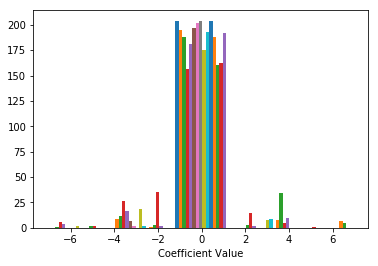


 Percentage accuracy
0.02857142857142857


In [51]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above. l2 stands for ridge regression regularization. The higher the 
# C value, the lower the lambda for ridge regression.  In the plain vanilla logistic regression above, our C value was 1e9,
# or 1 billion.  Here C will be 10, which will result in a higher lambda value.
logregr_L1 = LogisticRegression(penalty='l1', C=10)


# Fit the model.
logregr_L1.fit(train_XLR, train_YLR)

# Display.
print('Coefficients')
print(logregr_L1.coef_)
print(logregr_L1.intercept_)
plt.hist(logregr_L1.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
#pred_y = logregr.predict(test_X)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y, test_Y))

print('\n Percentage accuracy')
print(logregr_L1.score(test_XLR, test_YLR))

## L1 regularization after PCA:

Coefficients
[[ 0.          0.          0.         ...  0.64081209  0.
   0.01033684]
 [ 0.          1.24048769  0.         ... -0.0330098   0.31487406
  -0.00271924]
 [ 0.          1.1097171   0.         ...  0.          1.68083725
   0.07862697]
 ...
 [ 0.20501832 -0.39827477  0.05070682 ... -0.99421915  0.29779992
   0.        ]
 [ 0.          0.         -0.15149232 ...  0.         -1.06873127
   1.06107491]
 [ 0.          0.         -1.31215595 ...  0.84346702  0.19569451
  -0.20320559]]
[ -9.10234515  -7.60408485  -7.0861606   -7.91619884  -6.2447579
  -6.09037374  -6.17464519  -7.60516638  -6.81375483  -6.94614295
  -6.24299904  -6.24653843  -7.53587121  -7.00106803  -7.35814528
  -5.53484943  -6.24276102  -7.53497901  -7.53534112  -6.24366693
  -6.16452092  -6.16183396  -7.19425076  -6.8137054   -5.60404317
  -7.11174613  -7.50829199  -7.46882466 -10.97430255  -6.24421067
  -6.72671365  -6.24295299  -6.24506439  -7.12259682  -6.24453251
  -5.78535602  -8.04398893  -7.3738262   -

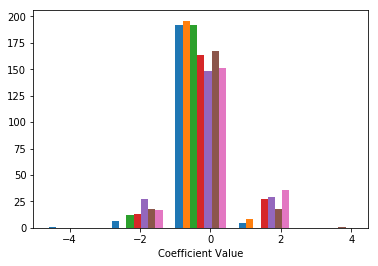


 Percentage accuracy
0.02857142857142857


In [52]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above. l2 stands for ridge regression regularization. The higher the 
# C value, the lower the lambda for ridge regression.  In the plain vanilla logistic regression above, our C value was 1e9,
# or 1 billion.  Here C will be 10, which will result in a higher lambda value.
logregr_L1_pca = LogisticRegression(penalty='l1', C=10)


# Fit the model.
logregr_L1_pca.fit(train_X_pcaLR, train_Y_pcaLR)

# Display.
print('Coefficients')
print(logregr_L1_pca.coef_)
print(logregr_L1_pca.intercept_)
plt.hist(logregr_L1_pca.coef_, bins=5)
plt.xlabel('Coefficient Value')
plt.show()
#pred_y = logregr.predict(test_X)
#print(pred_y.shape)
#print('\n Accuracy by admission status')
#print(pd.crosstab(pred_y, test_Y))

print('\n Percentage accuracy')
print(logregr_L1_pca.score(test_X_pcaLR, test_Y_pcaLR))

### After comparing the three models, the plain vanilla logistic regression model gave me the best accuracy scores.  Using selectKbest for feature selection, the accuracy score was 100%.  This may suggest that our model is overfitting to our data.  After using PCA for feature selection, the accuracy score of the logistic regression model was 94%.

### Combining my logistic regression model with L2 regularization, the coefficients for our parameters in the model decreased, but the accuracy of our model also significantly decreased.

### When I combined my logistic regression model with L1 regularization (lasso), the values of our coefficients were either at or centered around zero.  But the accuracy significantly dropped for this model also.

### I wish I could have found the optimum level for lamba, and used it to adjust my C parameter in the L1 and L2 parameters.  This could have made these models more accurate.